# Extracting multimodal data features

`siibra` provides access to data features of different modalities using the `get_features` method, which accepts a feature modality and is sensitive to the selections configured in the atlas (parcellation, region). If not particular selection is made, `get_features` considers all brain regions of the current parcellation.

In [20]:
import siibra

### Prerequisite: Allow  `siibra` to connect to the EBRAINS Knowledge Graph

Most of the features linked to atlas regions are curated datasets in the [EBRAINS knowledge graph](https://kg.ebrainseu) (KG). To fetch data from the KG, you need to pass an EBRAINS KG authentication token to siibra. For being able to generate such tokens, you need to follow three steps:

1. Register for an EBRAINS account, as described [here](https://ebrains.eu/register).
2. Enable API access for your EBRAINS account, as described [here](https://kg.humanbrainproject.eu/develop.html)).
3. Generate a token by visiting the [KG authorization endpoint](https://nexus-iam.humanbrainproject.org/v0/oauth2/authorize).

Step 1. and 2. need to be performed only once. Step 3 has to be performed every once in a while, since the KG does not (yet) provide persistent tokens. 

Just copy the token text from the resulting page, and run the next cell to paste it in.

In [21]:
siibra.set_ebrains_token(input('Paste in EBRAINS KG access token: '))

Paste in EBRAINS KG access token: eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJfNkZVSHFaSDNIRmVhS0pEZDhXcUx6LWFlZ3kzYXFodVNJZ1RXaTA1U2k0In0.eyJleHAiOjE2MzI3NzA3MjksImlhdCI6MTYzMjc2ODkyOSwiYXV0aF90aW1lIjoxNjMyNjY4ODUxLCJqdGkiOiJmZTY2Mzk0Yi1kYjgwLTQ0ZTMtYTA2NC1kY2VkZWI1ZmNkNjkiLCJpc3MiOiJodHRwczovL2lhbS5lYnJhaW5zLmV1L2F1dGgvcmVhbG1zL2hicCIsImF1ZCI6WyJyZWFsbS1tYW5hZ2VtZW50IiwianVweXRlcmh1YiIsInh3aWtpIiwidGVhbSIsImdyb3VwIl0sInN1YiI6IjY1MDM1MWJmLTI0OGUtNGUzYy04MWNjLTQ0MGZmNmQ5ZjQxNCIsInR5cCI6IkJlYXJlciIsImF6cCI6ImtnIiwibm9uY2UiOiJkMjFhZDQxMC1mOGUwLTQ2OTAtODQ1Ni1mYWU5ODVlMWE2MTAiLCJzZXNzaW9uX3N0YXRlIjoiZjE1Y2RlMmEtMjU2Mi00YTQ3LWE2ZjktYjM1MGQxMjFhNmFjIiwiYWNyIjoiMCIsInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgcm9sZXMgZW1haWwgY2xiLndpa2kucmVhZCB0ZWFtIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImdlbmRlciI6IjAiLCJuYW1lIjoiVGltbyBEaWNrc2NoZWlkIiwicHJlZmVycmVkX3VzZXJuYW1lIjoiZGlja3NjaGUiLCJnaXZlbl9uYW1lIjoiVGltbyIsImZhbWlseV9uYW1lIjoiRGlja3NjaGVpZCIsImVtYWlsIjoidC5kaWNrc2NoZWlkQGZ6LWp1ZWxpY2guZGUifQ.D8dMfbhqXY0WhWK

[siibra:INFO] Setting EBRAINS Knowledge Graph authentication token: eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJfNkZVSHFaSDNIRmVhS0pEZDhXcUx6LWFlZ3kzYXFodVNJZ1RXaTA1U2k0In0.eyJleHAiOjE2MzI3NzA3MjksImlhdCI6MTYzMjc2ODkyOSwiYXV0aF90aW1lIjoxNjMyNjY4ODUxLCJqdGkiOiJmZTY2Mzk0Yi1kYjgwLTQ0ZTMtYTA2NC1kY2VkZWI1ZmNkNjkiLCJpc3MiOiJodHRwczovL2lhbS5lYnJhaW5zLmV1L2F1dGgvcmVhbG1zL2hicCIsImF1ZCI6WyJyZWFsbS1tYW5hZ2VtZW50IiwianVweXRlcmh1YiIsInh3aWtpIiwidGVhbSIsImdyb3VwIl0sInN1YiI6IjY1MDM1MWJmLTI0OGUtNGUzYy04MWNjLTQ0MGZmNmQ5ZjQxNCIsInR5cCI6IkJlYXJlciIsImF6cCI6ImtnIiwibm9uY2UiOiJkMjFhZDQxMC1mOGUwLTQ2OTAtODQ1Ni1mYWU5ODVlMWE2MTAiLCJzZXNzaW9uX3N0YXRlIjoiZjE1Y2RlMmEtMjU2Mi00YTQ3LWE2ZjktYjM1MGQxMjFhNmFjIiwiYWNyIjoiMCIsInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgcm9sZXMgZW1haWwgY2xiLndpa2kucmVhZCB0ZWFtIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImdlbmRlciI6IjAiLCJuYW1lIjoiVGltbyBEaWNrc2NoZWlkIiwicHJlZmVycmVkX3VzZXJuYW1lIjoiZGlja3NjaGUiLCJnaXZlbl9uYW1lIjoiVGltbyIsImZhbWlseV9uYW1lIjoiRGlja3NjaGVpZCIsImVtYWlsIjoidC5kaWNrc2NoZWlkQGZ6

### Densities of neurotransmitter receptors

Transmitter receptor density fingerprints are linked to brain regions by their name in the EBRAINS Knowledge Graph. Like any data feature, they are accessed using the `get_features` method of the atlas, which makes use of the current selection in the atlas. The `get_features` method knows from the specified data modality that the match is determined from the brain region identified. Receptor densities come as a nicely structured datatype. Amongst other things, they can visualize themselves in a plot.

If we don't specify a particular selection, the atlas will return all available receptor density features linked to the parcellation map:

In [3]:
atlas = siibra.atlases['human']
julichbrain = atlas.get_parcellation("julich")
for f in siibra.get_features(julichbrain,"receptor"):
    print(f.matched_region.name, f)

[siibra:INFO] Multiple elements matched the specification 'julich' - the first in order was chosen: Julich-Brain Cytoarchitectonic Maps 2.9


Area hOc1 (V1, 17, CalcS) ReceptorDistribution for Area hOc1 (V1, 17, CalcS)
Area PFop (IPL) left ReceptorDistribution for Area PFop (IPL)
CA3 (Hippocampus) right ReceptorDistribution for CA3 (Hippocampus)
Area 45 (IFG) right ReceptorDistribution for Area 45 (IFG)
CA3 (Hippocampus) right ReceptorDistribution for CA3 (Hippocampus)
Area IFS1 (IFS) ReceptorDistribution for Area ifs1 (IFS)
Area PGa (IPL) right ReceptorDistribution for Area PGa (IPL)
Area PFcm (IPL) left ReceptorDistribution for Area PFcm (IPL)
Area FG1 (FusG) left ReceptorDistribution for Area FG1 (FusG)
Area IFS3 (IFS) right ReceptorDistribution for Area ifs3 (IFS)
CA1 (Hippocampus) right ReceptorDistribution for CA1 (Hippocampus)
Area hOc3v (LingG) left ReceptorDistribution for Area hOc3v (LingG)
DG (Hippocampus) left ReceptorDistribution for DG (Hippocampus)
Area 3b (PostCG) left ReceptorDistribution for Area 3b (PostCG)
Area PFm (IPL) right ReceptorDistribution for Area PFm (IPL)
Area PF (IPL) left ReceptorDistribution

If we select a region, the returned list is filtered accordingly. 

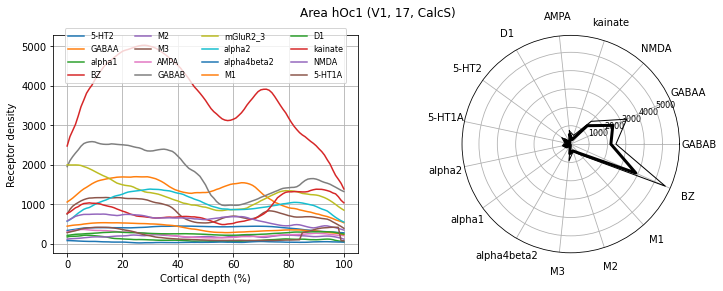

In [4]:
import siibra
atlas = siibra.atlases['human']
v1 = atlas.get_region('v1',parcellation="julich 2.9")
r, = siibra.get_features(v1,"receptor")
fig = r.plot(r.matched_region.name)

### Layer-specific cell distributions in cortical regions

This version of siibra provides a pre-release preview of layer-specific cell distributions in different areas of BigBrain.

[siibra:WARNING] PREVIEW DATA! CorticalCellDistribution data is only a pre-release snapshot. Contact support@ebrains.eu if you intend to use this data.
[siibra:INFO] A NeuroglancerMesh object was registered, but this type is not yet explicitly supported.


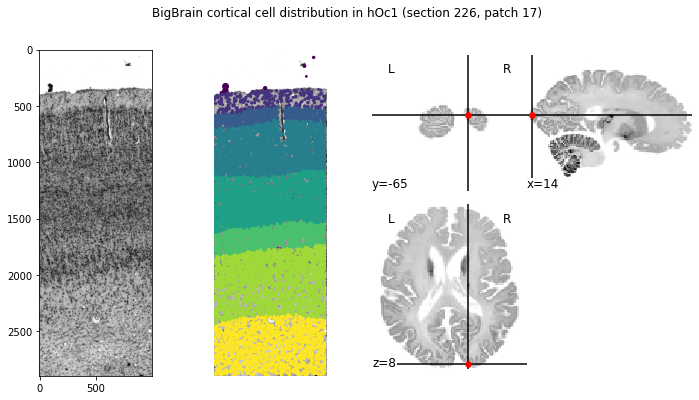

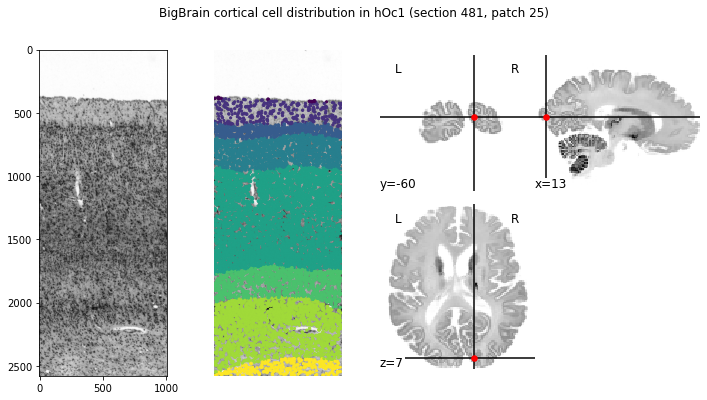

In [5]:
features = siibra.get_features(v1,"celldistribution")
for index in [0,-1]:
    # we plot only the first and last feature here
    fig = features[index].plot(features[index].matched_region.name)

### Gene Expressions from the Allen Atlas 

The atlas client can make calls to gene expression data from the Allen atlas and evaluate them in the ICBM space to find regional gene expression levels. It also has a list of available gene names for convenient selection. Gene expressions are linked to atlas regions by coordinates of their probes in MNI space. The `get_features` method detects this from the feature modality, and applies the mask of the regions that are currently selected in the atlas to filter the probes. We can visualize these filtered locations.

[siibra:INFO] Retrieving probe ids for gene GABARAPL2
[siibra:INFO] A GiftiSurfaceLabeling object was registered, but this type is not yet explicitly supported.



    For retrieving microarray data, siibra connects to the web API of
    the Allen Brain Atlas (© 2015 Allen Institute for Brain Science),
    available from https://brain-map.org/api/index.html. Any use of the
    microarray data needs to be in accordance with their terms of use,
    as specified at https://alleninstitute.org/legal/terms-use/.
    
GeneExpression at Point in MNI152 2009c nonl asym [-9.0,-69.0,-1.0]


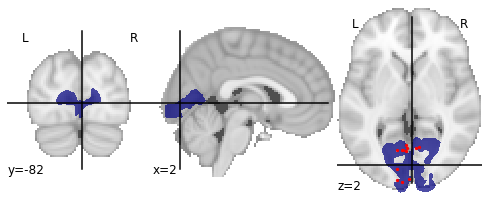

In [6]:
features = siibra.get_features(v1,"gene",gene="GABARAPL2")
print(features[0])

# plot
from nilearn import plotting
all_coords = [tuple(g.location) for g in features]
mask = v1.build_mask("mni152")
display = plotting.plot_roi(mask)
display.add_markers(all_coords,marker_size=5) 

### Connectivity matrices
For `siibra`, a connectivity matrix is a data feature like the others below, and can be found using the same `get_features` function just by choosing another modality. `siibra` knows from the modality type that this type of data does not match to the selected brain region in the atlas, but to the selected parcellation. Therefore, `get_features` return connectivity datasets that are defined for the selected parcellation. 

To learn about the nature of the provided connectivity, the `src_info` attribute provides a detailed description of the dataset. 

<ipython-input-7-eedaa28c6a19>:15: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(feature.array),cmap=plt.cm.hot)
<ipython-input-7-eedaa28c6a19>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


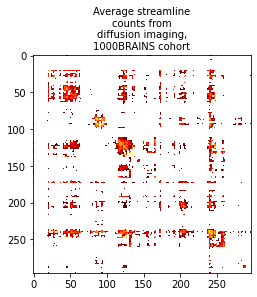

In [7]:
# Get the first four connectivity matrices available for the parcellation
features = siibra.get_features(julichbrain,"connectivitymatrix")

# format dataset names for use as figure titles
from textwrap import wrap
titleformat = lambda text : "\n".join(wrap(text.replace('_',' '),20)) 

# plot the matrices
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
for i,feature in enumerate(features):
    ax = fig.add_subplot(1,len(features),i+1)
    ax.imshow(np.log(feature.array),cmap=plt.cm.hot)
    ax.set_title(titleformat(feature.name),size=10)
fig.show()

### Locations of iEEG recordings

iEEG data is queried per session/subject. The data is organized into multiple electrodes per session, and multiple contact points per electrode. Iterating over a session yields its electrodes. Iterating over each electrode yields its contact points. Each of these items are themselves of type `SpatialFeature`, so they have a `.location` and can be matched against an atlas. Below, we use this to visualize MNI coordinates of contact points which correspond to electrodes touching the selected region. We highlight the contact points inside the selected atlas region in red.

In [8]:
sessions = siibra.get_features(v1,"ieeg")

coords = [pt
          for session in sessions
          for electrode in session
          for pt in electrode.location
          if electrode.match(v1)]

from nilearn import plotting
mask = v1.build_mask("mni152")
plotting.view_markers(
    [tuple(pt) for pt in coords],
    ["red" if pt.intersects_mask(mask) else "blue"
    for pt in coords ],
    marker_size=3)

### Neuron morphologies

`siibra` has an interface to the [NeuroMorpho](https://neuromorpho.org) repository of single neuronal cell reconstructions.

[siibra:INFO] No parcellation specified, using default 'Julich-Brain Cytoarchitectonic Maps 2.9'.
[siibra:INFO] Found 145 neurons for inferior frontal gyrus, not considering more matched names.



    siibra accesses the API of NeuroMorpho.org to find neuron morphology datasets.
    Any use of these needs to comply with the terms of use specified at

        http://neuromorpho.org/useterm.jsp

    Especially, please cite the below paper for using the resource, as well as the
    specific publication associated to each neuron, as provided by the
    'publications' attribute of each returned feature.

    Ascoli GA, Donohue DE, Halavi M. (2007) NeuroMorpho.Org: a central resource for neuronal morphologies. J Neurosci., 27(35):9247-51)


<IPython.core.display.Javascript object>


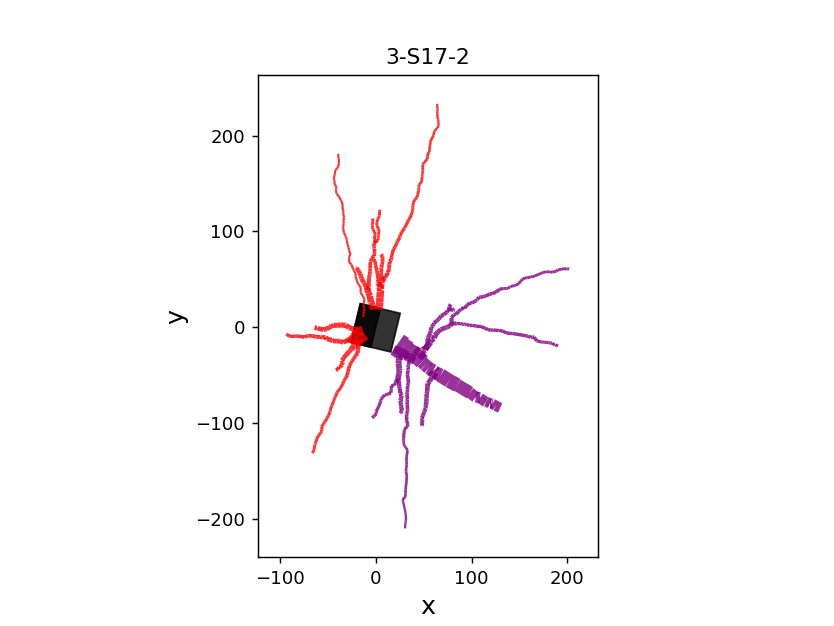

/usr/local/lib/python3.9/site-packages/neurom/view/common.py:110: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(subplot, **params)


<IPython.core.display.Javascript object>


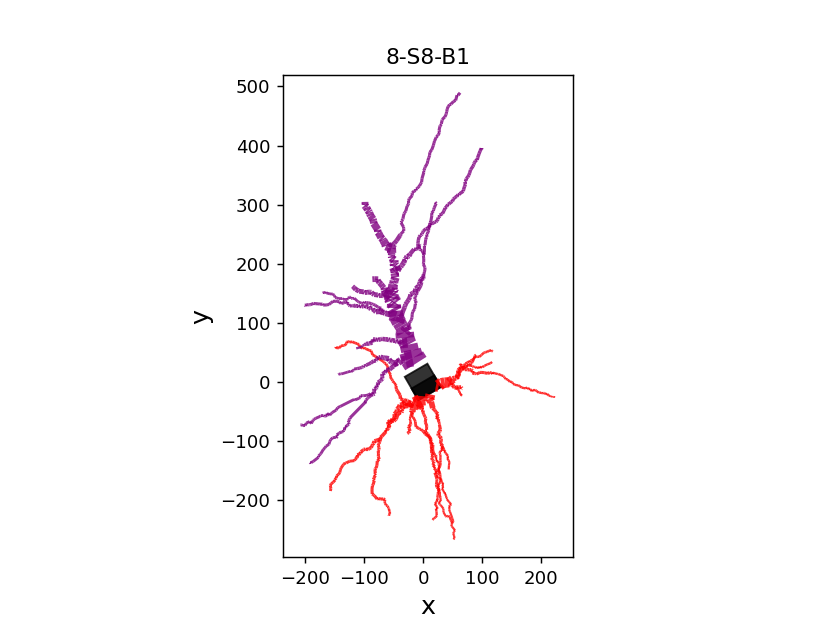

/usr/local/lib/python3.9/site-packages/neurom/view/common.py:110: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(subplot, **params)


In [7]:
import warnings
neurons = siibra.get_features(atlas.get_region('ifg'),'morphology')
for n in neurons[:2]:
    n.plot()

### Other regional datasets

In [ ]:
for f in siibra.get_features(v1,"ebrains"):
    print(f"{f.name}\n{f.url}\n")